# 2. Schrodinger equation <a id="second-chapter"></a>

## <font color = "navy" >2.3 Examples </font> <a id="2.3"></a>

### <font color = "navy" >2.3.2 Particle in a 3D “box” </font>

In [1]:
from pylab import *
#Constants (all MKS, except energy which is in eV)
hbar=1.055e-34
m=9.110e-31
epsil=8.854e-12
q=1.602e-19
a0=4*pi*epsil*hbar*hbar/(m*q*q)
E0=q/(8*pi*epsil*a0)

#Lattice
Np=100
a=(5e-10*1/Np)
R=a*array(list(range(1,Np+1)))
t0=(hbar**2)/(2*m*(a**2))/q

#Quantum numbers
n=1
l=0

In [2]:
#Hamiltonian,H = Kinetic,K + Potential,U
K=(2*t0*diag(ones((Np)))-(t0*diag(ones((Np-1)),1))-(t0*diag(ones((Np-1)),-1)))
U=((-q/(4*pi*epsil)/R)+(l*(l+1)*hbar*hbar/(2*m*q))/(R*R))
U=diag(U)
[D,V]=eigh(K+U)
DD=sort(D)

ind=array(list(range(0,100)))

#analytical solutions
P1s=(4*a/(a0**3))*R*R*exp(-2*R/a0)
P2s=(4*a/(2*4*4*(a0**3)))*R*R*((2-(R/a0))**2)*exp(-2*R/(2*a0))
P3s=(4*a/(3*81*81*(a0**3)))*R*R*((27-(18*R/a0)+(2*(R/a0)**2))**2)*exp(-2*R/(3*a0))
P2p=(4*a/(3*32*(a0**3)))*R*R*((R/a0)**2)*exp(-2*R/(2*a0))
P3p=(8*a/(3*81*81*(a0**3)))*R*R*((6-(R/a0))**2)*((R/a0)**2)*exp(-2*R/(3*a0))

In [3]:
#for numerical
#for 1s
n=1
l=0
E=D[ind[n-l-1]]
psi=V[:,ind[n-l-1]]
P1=psi*conj(psi)

#for 2s
n=2
l=0
E=D[ind[n-l-1]]
psi=V[:,ind[n-l-1]]
P2=psi*conj(psi)

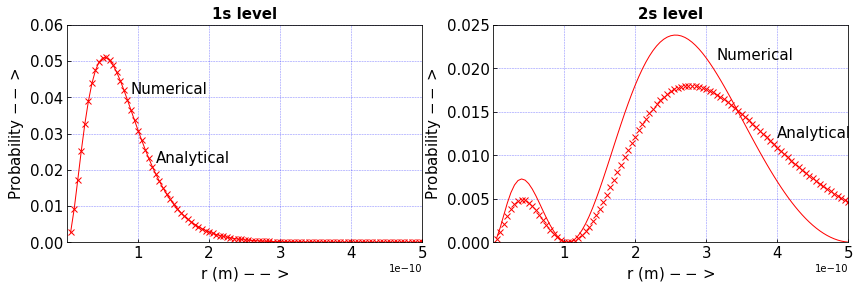

In [4]:
figure(figsize=(14,4))
subplot(1,2,1)
plot(R,P1,'r',lw=1) #numerical for '1s'
plot(R,P1s,'rx',lw=1) #P1s for '1s'
xlabel(' r (m) $-->$ ',fontsize=15)
ylabel(' Probability $-->$ ',fontsize=15)
xlim(0,5e-10)
ylim(0,0.06)
tick_params(axis='both',which='major',labelsize=15,direction='in')
xticks(arange(1e-10,6e-10,1e-10),fontsize=15)
title('1s level',fontsize=15,fontweight='bold')
text(0.9e-10,0.041,'Numerical',fontsize=15)
text(1.25e-10,0.022,'Analytical',fontsize=15)
grid(color='b', alpha=0.5, ls='--',lw=0.5)

subplot(1,2,2)
plot(R,P2,'r',lw=1) #numerical for '2s'
plot(R,P2s,'rx',lw=1) #P2s for '2s'
xlabel(' r (m) $-->$ ',fontsize=15)
ylabel(' Probability $-->$ ',fontsize=15)
xlim(0,5e-10)
ylim(0,0.025)
tick_params(axis='both',which='major',labelsize=15,direction='in')
xticks(arange(1e-10,6e-10,1e-10),fontsize=15)
title('2s level',fontsize=15,fontweight='bold')
text(3.15e-10,0.021,'Numerical',fontsize=15)
text(4e-10,0.012,'Analytical',fontsize=15)
grid(color='b', alpha=0.5, ls='--',lw=0.5)